# MSCA31010
## Sijie Li
## Assignment 2

# Import pacakages

In [2]:

import matplotlib.pyplot as plt
import numpy
import pandas
import sys

from scipy.special import loggamma
from scipy.stats import norm

sys.path.append(r'C:\Users\Sijie Li\OneDrive - The University of Chicago\Documents\MSCA\Winter2021\MSCA31010 Linear')
import Regression

from scipy.stats import chi2

# Import data and format data

In [3]:
#import file and select predictors
claim_history = pandas.read_csv(r'C:\Users\Sijie Li\OneDrive - The University of Chicago\Documents\MSCA\Winter2021\MSCA31010 Linear\Wk3\claim_history.csv')

trainData = claim_history[['CLM_COUNT', 'EXPOSURE', 'HOMEKIDS', 'KIDSDRIV','CAR_TYPE','MSTATUS','REVOKED','URBANICITY','MVR_PTS', 'TIF', 'TRAVTIME','CAR_AGE']].dropna()

trainData.reset_index(inplace = True)

trainData.head()

,index,CLM_COUNT,EXPOSURE,HOMEKIDS,KIDSDRIV,CAR_TYPE,MSTATUS,REVOKED,URBANICITY,MVR_PTS,TIF,TRAVTIME,CAR_AGE
0,0,0,0.189,0,0,Minivan,No,No,Highly Urban/ Urban,3,11,14,18.0
1,1,0,1.000,0,0,Minivan,No,No,Highly Urban/ Urban,0,1,22,1.0
2,2,0,1.000,0,0,Van,No,No,Highly Urban/ Urban,2,1,26,10.0
3,3,0,0.828,1,0,SUV,Yes,No,Highly Urban/ Urban,3,4,5,10.0
4,4,0,0.729,0,0,Minivan,Yes,No,Highly Urban/ Urban,0,7,32,6.0


In [4]:
# Set some options for printing all the columns
numpy.set_printoptions(precision = 10, threshold = sys.maxsize)
numpy.set_printoptions(linewidth = numpy.inf)

pandas.set_option('display.max_columns', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)
pandas.set_option('precision', 10)

pandas.options.display.float_format = '{:,.7e}'.format

In [5]:
trainData['MSTATUS'].replace(('Yes', 'No'), ("Myes", "Mno"), inplace=True)
trainData['REVOKED'].replace(('Yes', 'No'), ("Ryes", "Rno"), inplace=True)

In [6]:
# Reorder the categories in ascending order of frequencies of the target field
#CAR_TYPE
u = trainData['CAR_TYPE'].astype('category')
u_freq = u.value_counts(ascending = True)
pm = u.cat.reorder_categories(list(u_freq.index))
term_car_type = pandas.get_dummies(pm)

#MSTATUS & REVOKED

s = trainData['MSTATUS'].astype('category')
s_freq = s.value_counts(ascending = True)
pm2 = s.cat.reorder_categories(list(s_freq.index))
term_mstatus = pandas.get_dummies(pm2)

a = trainData['REVOKED'].astype('category')
a_freq = a.value_counts(ascending = True)
pm3 = a.cat.reorder_categories(list(a_freq.index))
term_revoked = pandas.get_dummies(pm3)


# URBANICITY
b = trainData['URBANICITY'].astype('category')
b_freq = b.value_counts(ascending = True)
pm4 = b.cat.reorder_categories(list(b_freq.index))
term_urban_city = pandas.get_dummies(pm4)


In [7]:
trainData.head()

,index,CLM_COUNT,EXPOSURE,HOMEKIDS,KIDSDRIV,CAR_TYPE,MSTATUS,REVOKED,URBANICITY,MVR_PTS,TIF,TRAVTIME,CAR_AGE
0,0,0,1.8900000e-01,0,0,Minivan,Mno,Rno,Highly Urban/ Urban,3,11,14,1.8000000e+01
1,1,0,1.0000000e+00,0,0,Minivan,Mno,Rno,Highly Urban/ Urban,0,1,22,1.0000000e+00
2,2,0,1.0000000e+00,0,0,Van,Mno,Rno,Highly Urban/ Urban,2,1,26,1.0000000e+01
3,3,0,8.2800000e-01,1,0,SUV,Myes,Rno,Highly Urban/ Urban,3,4,5,1.0000000e+01
4,4,0,7.2900000e-01,0,0,Minivan,Myes,Rno,Highly Urban/ Urban,0,7,32,6.0000000e+00


# Question 1

## Visualize the CLM_COUNT versus CAR_TYPE

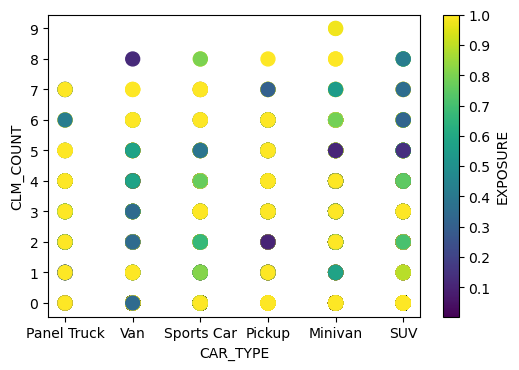

In [119]:
#  Visualize the CLM_COUNT versus CAR_TYPE
plt.figure(dpi = 100)
df = pandas.DataFrame(pm).join(trainData['CLM_COUNT'])
df = pandas.DataFrame(df).join(trainData['EXPOSURE'])
scatter = plt.scatter(df['CAR_TYPE'].sort_values(), df['CLM_COUNT'], s = 100, c = df['EXPOSURE'] )
plt.xlabel('CAR_TYPE')
plt.ylabel('CLM_COUNT')
plt.yticks([0,1,2,3,4,5,6,7,8,9])
cbar = plt.colorbar(scatter,label='EXPOSURE')
cbar.set_ticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.show()

## Visualize the CLM_COUNT versus MSTATUS

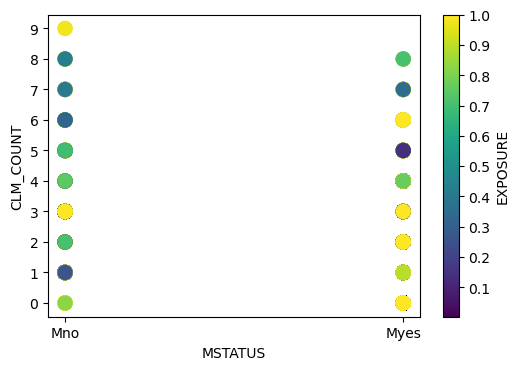

In [120]:
#  Visualize the CLM_COUNT versus MSTATUS
plt.figure(dpi = 100)
#df2 = pandas.DataFrame(trainData['MSTATUS']).join(trainData['CLM_COUNT'])
#df2 = pandas.DataFrame(df2).join(trainData['EXPOSURE'])
scatter2 = plt.scatter(trainData['MSTATUS'], trainData['CLM_COUNT'], s = 100, c = trainData['EXPOSURE'] )
plt.xlabel('MSTATUS')
plt.xticks([0,1])
plt.ylabel('CLM_COUNT')
plt.yticks([0,1,2,3,4,5,6,7,8,9])
cbar = plt.colorbar(scatter2,label='EXPOSURE')
cbar.set_ticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.show()

## Visualize the CLM_COUNT versus HOMEKIDS

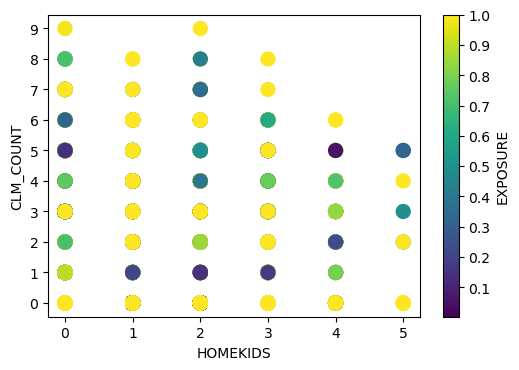

In [126]:
#  Visualize the CLM_COUNT versus HOMEKIDS
plt.figure(dpi = 100)
#df2 = pandas.DataFrame(trainData['MSTATUS']).join(trainData['CLM_COUNT'])
#df2 = pandas.DataFrame(df2).join(trainData['EXPOSURE'])
scatter2 = plt.scatter(trainData['HOMEKIDS'], trainData['CLM_COUNT'], s = 100, c = trainData['EXPOSURE'] )
plt.xlabel('HOMEKIDS')
plt.xticks(range(0,6))
plt.ylabel('CLM_COUNT')
plt.yticks([0,1,2,3,4,5,6,7,8,9])
cbar = plt.colorbar(scatter2,label='EXPOSURE')
cbar.set_ticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.show()

## Visualize the CLM_COUNT versus KIDSDRIV

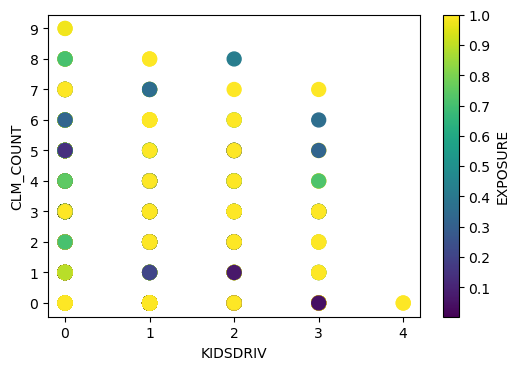

In [128]:
#  Visualize the CLM_COUNT versus KIDSDRIV
plt.figure(dpi = 100)
scatter2 = plt.scatter(trainData['KIDSDRIV'], trainData['CLM_COUNT'], s = 100, c = trainData['EXPOSURE'] )
plt.xlabel('KIDSDRIV')
plt.xticks(range(0,5))
plt.ylabel('CLM_COUNT')
plt.yticks([0,1,2,3,4,5,6,7,8,9])
cbar = plt.colorbar(scatter2,label='EXPOSURE')
cbar.set_ticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.show()

## Visualize the CLM_COUNT versus REVOKED

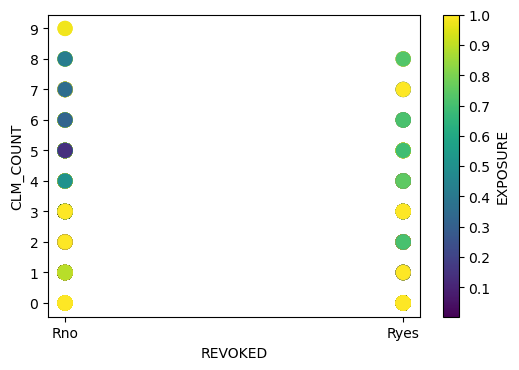

In [130]:
#  Visualize the CLM_COUNT versus REVOKED
plt.figure(dpi = 100)
scatter2 = plt.scatter(trainData['REVOKED'], trainData['CLM_COUNT'], s = 100, c = trainData['EXPOSURE'] )
plt.xlabel('REVOKED')
plt.xticks(range(0,2))
plt.ylabel('CLM_COUNT')
plt.yticks([0,1,2,3,4,5,6,7,8,9])
cbar = plt.colorbar(scatter2,label='EXPOSURE')
cbar.set_ticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.show()

## Visualize the CLM_COUNT versus URBANICITY

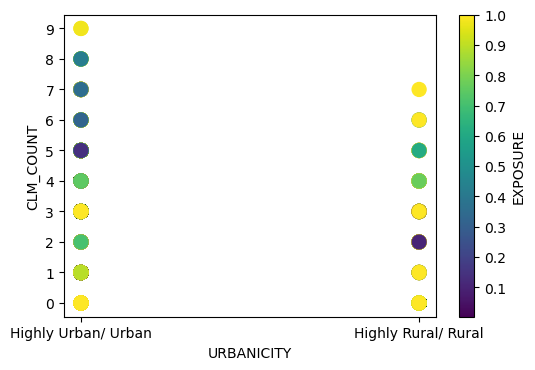

In [133]:
#  Visualize the CLM_COUNT versus URBANICITY
plt.figure(dpi = 100)
scatter2 = plt.scatter(trainData['URBANICITY'], trainData['CLM_COUNT'], s = 100, c = trainData['EXPOSURE'] )
plt.xlabel('URBANICITY')
plt.xticks(range(0,2))
plt.ylabel('CLM_COUNT')
plt.yticks([0,1,2,3,4,5,6,7,8,9])
cbar = plt.colorbar(scatter2,label='EXPOSURE')
cbar.set_ticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.show()

## Visualize the CLM_COUNT versus CAR_AGE

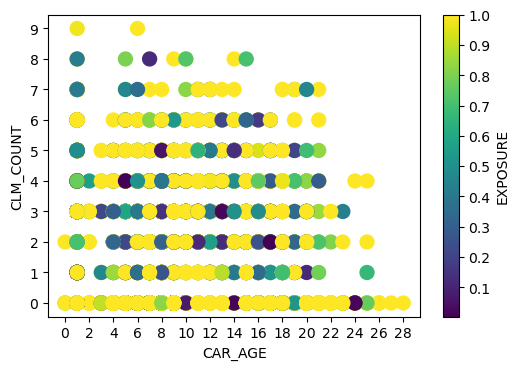

In [151]:
#  Visualize the CLM_COUNT versus CAR_AGE
plt.figure(dpi = 100)
scatter2 = plt.scatter(trainData['CAR_AGE'], trainData['CLM_COUNT'], s = 100, c = trainData['EXPOSURE'] )
plt.xlabel('CAR_AGE')
plt.xticks(range(0,30,2))
plt.ylabel('CLM_COUNT')
plt.yticks([0,1,2,3,4,5,6,7,8,9])
cbar = plt.colorbar(scatter2,label='EXPOSURE')
cbar.set_ticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.show()

## Visualize the CLM_COUNT versus MVR_PTS

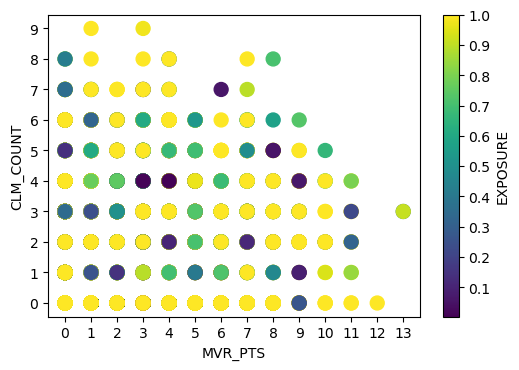

In [156]:
#  Visualize the CLM_COUNT versus MVR_PTS
plt.figure(dpi = 100)
scatter2 = plt.scatter(trainData['MVR_PTS'], trainData['CLM_COUNT'], s = 100, c = trainData['EXPOSURE'] )
plt.xlabel('MVR_PTS')
plt.xticks(range(0,14,1))
plt.ylabel('CLM_COUNT')
plt.yticks([0,1,2,3,4,5,6,7,8,9])
cbar = plt.colorbar(scatter2,label='EXPOSURE')
cbar.set_ticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.show()

## Visualize the CLM_COUNT versus TIF

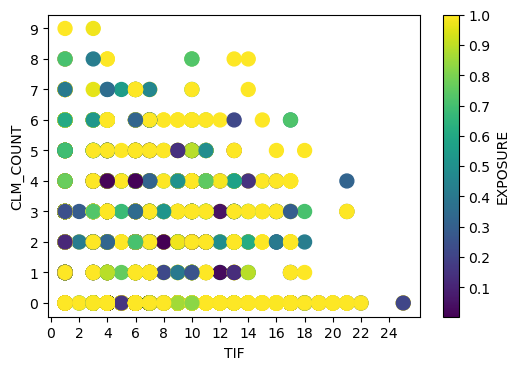

In [159]:
#  Visualize the CLM_COUNT versus TIF
plt.figure(dpi = 100)
scatter2 = plt.scatter(trainData['TIF'], trainData['CLM_COUNT'], s = 100, c = trainData['EXPOSURE'] )
plt.xlabel('TIF')
plt.xticks(range(0,26,2))
plt.ylabel('CLM_COUNT')
plt.yticks([0,1,2,3,4,5,6,7,8,9])
cbar = plt.colorbar(scatter2,label='EXPOSURE')
cbar.set_ticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.show()

## Visualize the CLM_COUNT versus TRAVTIME

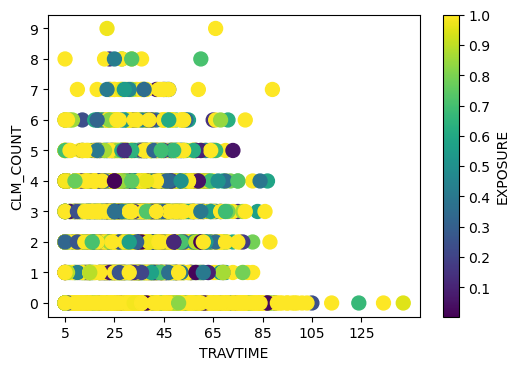

In [160]:
#  Visualize the CLM_COUNT versus TRAVTIME
plt.figure(dpi = 100)
scatter2 = plt.scatter(trainData['TRAVTIME'], trainData['CLM_COUNT'], s = 100, c = trainData['EXPOSURE'] )
plt.xlabel('TRAVTIME')
plt.xticks(range(5,143,20))
plt.ylabel('CLM_COUNT')
plt.yticks([0,1,2,3,4,5,6,7,8,9])
cbar = plt.colorbar(scatter2,label='EXPOSURE')
cbar.set_ticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.show()

# Question 2

### Set predictors and run model with intercept

In [8]:
# Set predictors
term_homekids = trainData['HOMEKIDS']
term_kidsdriv = trainData['KIDSDRIV']
term_car_age = trainData['CAR_AGE']
term_mvr_pts = trainData['MVR_PTS']
term_tif = trainData['TIF']
term_travtime = trainData['TRAVTIME']
#term_revoked = trainData['REVOKED']
#term_mstatus = trainData['MSTATUS']

y_train = trainData['CLM_COUNT']
n_sample = len(y_train)
e_train = trainData['EXPOSURE']
o_train_X = numpy.log(e_train)

In [9]:
# model Poisson GLM with Intercept only model
X_train = trainData[['CLM_COUNT']].copy()
X_train.insert(0, 'Intercept', 1.0)
X_train.drop(columns = ['CLM_COUNT'], inplace = True)
step_summary = pandas.DataFrame()
outList = Regression.PoissonModel(X_train, y_train, o_train_X)
llk_0 = outList[3]
df_0 = len(outList[4])
step_summary = step_summary.append([['Intercept', df_0, llk_0, numpy.nan, 
numpy.nan, numpy.nan]], ignore_index = True)
step_summary

,0,1,2,3,4,5
0,Intercept,1,-1.7324418e+04,NaN,NaN,NaN


## a) Begain forward selection

### Find first predictor

In [10]:
# Find the first predictor
step_detail = pandas.DataFrame()

# Try Intercept + CAR_TYPE
X = X_train.join(term_car_type)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])
deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ CAR_TYPE', df_1, llk_1, deviance_chisq, 
deviance_df, deviance_sig]], ignore_index = True)

In [11]:
# Try Intercept + HOMEKIDS
X = X_train.join(term_homekids)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])
deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ HOMEKIDS', df_1, llk_1, deviance_chisq, 
deviance_df, deviance_sig]], ignore_index = True)


In [12]:
# Try Intercept + KIDSDRIV
X = X_train.join(term_kidsdriv)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])
deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ KIDSDRIV', df_1, llk_1, deviance_chisq, 
deviance_df, deviance_sig]], ignore_index = True)


In [13]:
# Try Intercept + CAR_AGE
X = X_train.join(term_car_age)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])
deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ CAR_AGE', df_1, llk_1, deviance_chisq, 
deviance_df, deviance_sig]], ignore_index = True)


In [14]:
# Try Intercept + MVR_PTS
X = X_train.join(term_mvr_pts)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])
deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ MVR_PTS', df_1, llk_1, deviance_chisq, 
deviance_df, deviance_sig]], ignore_index = True)


In [15]:
# Try Intercept + TIF
X = X_train.join(term_tif)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])
deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ TIF', df_1, llk_1, deviance_chisq, 
deviance_df, deviance_sig]], ignore_index = True)


In [16]:
# Try Intercept + TRAVTIME
X = X_train.join(term_travtime)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])
deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ TRAVTIME', df_1, llk_1, deviance_chisq, 
deviance_df, deviance_sig]], ignore_index = True)


In [17]:
# Try Intercept + MSTATUS
X = X_train.join(term_mstatus)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])
deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ MSTATUS', df_1, llk_1, deviance_chisq, 
deviance_df, deviance_sig]], ignore_index = True)

In [18]:
# Try Intercept + REVOKED
X = X_train.join(term_revoked)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])
deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ REVOKED', df_1, llk_1, deviance_chisq, 
deviance_df, deviance_sig]], ignore_index = True)

In [19]:
# Try Intercept + URBANICITY
X = X_train.join(term_urban_city)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])
deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY', df_1, llk_1, deviance_chisq, 
deviance_df, deviance_sig]], ignore_index = True)

In [20]:
step_detail

,0,1,2,3,4,5
0,+ CAR_TYPE,6,-1.7117143e+04,4.1454849e+02,5,2.1690060e-87
1,+ HOMEKIDS,2,-1.7168230e+04,3.1237428e+02,1,6.6375895e-70
2,+ KIDSDRIV,2,-1.7209684e+04,2.2946760e+02,1,7.7884619e-52
3,+ CAR_AGE,2,-1.7170782e+04,3.0727097e+02,1,8.5848521e-69
4,+ MVR_PTS,2,-1.6816770e+04,1.0152957e+03,1,8.5025203e-223
5,+ TIF,2,-1.7249465e+04,1.4990488e+02,1,1.8186579e-34
6,+ TRAVTIME,2,-1.7285968e+04,7.6900009e+01,1,1.7983635e-18
7,+ MSTATUS,2,-1.7138676e+04,3.7148307e+02,1,8.8978669e-83
8,+ REVOKED,2,-1.7087785e+04,4.7326491e+02,1,6.2417433e-105
9,+ URBANICITY,2,-1.6480902e+04,1.6870313e+03,1,0.0000000e+00


#### URBANICITY has the lowest sig value, chose to insert to model

In [21]:
# Current model is Intercept + URBANICITY
row = step_detail[step_detail[0] == '+ URBANICITY']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(term_urban_city)

In [22]:
step_summary

,0,1,2,3,4,5
0,Intercept,1,-1.7324418e+04,NaN,NaN,NaN
1,+ URBANICITY,2,-1.6480902e+04,1.6870313e+03,1.0000000e+00,0.0000000e+00


### Find second predictor

In [23]:
# Find the second predictor
step_detail = pandas.DataFrame()

In [24]:
# Try Intercept + URBANICITY + MSTATUS
X = X_train.join(term_mstatus)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ MVR_PTS + MSTATUS', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [25]:
# Try Intercept + URBANICITY + CAR_TYPE
X = X_train.join(term_car_type)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ MVR_PTS + CAR_TYPE', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [26]:
# Try Intercept + URBANICITY + HOMEKIDS
X = X_train.join(term_homekids)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ MVR_PTS + HOMEKIDS', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [27]:
# Try Intercept + URBANICITY + KIDSDRIV
X = X_train.join(term_kidsdriv)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ MVR_PTS + KIDSDRIV', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [28]:
# Try Intercept + URBANICITY + REVOKED
X = X_train.join(term_revoked)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ MVR_PTS + REVOKED', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [29]:
# Try Intercept + URBANICITY + MVR_PTS 
X = X_train.join(term_mvr_pts)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [30]:
# Try Intercept + URBANICITY + CAR_AGE
X = X_train.join(term_car_age)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ MVR_PTS + CAR_AGE', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [31]:
# Try Intercept + URBANICITY + TIF
X = X_train.join(term_tif)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ MVR_PTS + TIF', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [32]:
# Try Intercept + URBANICITY + TRAVTIME
X = X_train.join(term_travtime)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ MVR_PTS + TRAVTIME', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [33]:
step_detail

,0,1,2,3,4,5
0,+ MVR_PTS + MSTATUS,3,-1.6293921e+04,3.7396190e+02,1,2.5678957e-83
1,+ MVR_PTS + CAR_TYPE,7,-1.6240861e+04,4.8008250e+02,5,1.5882329e-101
2,+ MVR_PTS + HOMEKIDS,3,-1.6285360e+04,3.9108366e+02,1,4.8079930e-87
3,+ MVR_PTS + KIDSDRIV,3,-1.6341902e+04,2.7800065e+02,1,2.0478305e-62
4,+ MVR_PTS + REVOKED,3,-1.6306860e+04,3.4808329e+02,1,1.1079845e-77
5,+ URBANICITY + MVR_PTS,3,-1.6132234e+04,6.9733640e+02,1,1.1348123e-153
6,+ MVR_PTS + CAR_AGE,3,-1.6200237e+04,5.6132939e+02,1,4.3194961e-124
7,+ MVR_PTS + TIF,3,-1.6401737e+04,1.5833090e+02,1,2.6202162e-36
8,+ MVR_PTS + TRAVTIME,3,-1.6364951e+04,2.3190220e+02,1,2.2935630e-52


#### Insert MVR_PTS for the second predictor

In [34]:
# Current model is Intercept + URBANICITY + MVR_PTS 
row = step_detail[step_detail[0] == '+ URBANICITY + MVR_PTS']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(term_mvr_pts)

In [35]:
step_summary

,0,1,2,3,4,5
0,Intercept,1,-1.7324418e+04,NaN,NaN,NaN
1,+ URBANICITY,2,-1.6480902e+04,1.6870313e+03,1.0000000e+00,0.0000000e+00
2,+ URBANICITY + MVR_PTS,3,-1.6132234e+04,6.9733640e+02,1.0000000e+00,1.1348123e-153


### Find the third predictor

In [36]:
# Find the third predictor
step_detail = pandas.DataFrame()

In [37]:
# Try Intercept + URBANICITY + MVR_PTS  + MSTATUS
X = X_train.join(term_mstatus)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS  + MSTATUS', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [38]:
# Try Intercept + URBANICITY + MVR_PTS  + CAR_TYPE
X = X_train.join(term_car_type)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS  + CAR_TYPE', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [39]:
# Try Intercept + URBANICITY + MVR_PTS  + HOMEKIDS
X = X_train.join(term_homekids)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS  + HOMEKIDS', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [40]:
# Try Intercept + URBANICITY + MVR_PTS + URBANICITY + KIDSDRIV
X = X_train.join(term_kidsdriv)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS + URBANICITY + KIDSDRIV', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [41]:
# Try Intercept + URBANICITY + MVR_PTS  + REVOKED
X = X_train.join(term_revoked)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS  + REVOKED', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [51]:
# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE
X = X_train.join(term_car_age)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS + CAR_AGE', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [52]:
# Try Intercept + URBANICITY + MVR_PTS + URBANICITY + TIF
X = X_train.join(term_tif)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS + URBANICITY + TIF', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [53]:
# Try Intercept + URBANICITY + URBANICITY + TRAVTIME
X = X_train.join(term_travtime)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + URBANICITY + TRAVTIME', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [54]:
step_detail

,0,1,2,3,4,5
0,+ MVR_PTS + URBANICITY + MSTATUS,4,-1.5975215e+04,3.1403717e+02,1,2.8825236e-70
1,+ URBANICITY + MVR_PTS + CAR_TYPE,8,-1.5932299e+04,3.9987010e+02,5,3.1641902e-84
2,+ URBANICITY + MVR_PTS + HOMEKIDS,4,-1.5982629e+04,2.9921031e+02,1,4.8957574e-67
3,+ URBANICITY + MVR_PTS + URBANICITY + KIDSDRIV,4,-1.6021390e+04,2.2168679e+02,1,3.8766688e-50
4,+ URBANICITY + MVR_PTS + REVOKED,4,-1.5975839e+04,3.1278936e+02,1,5.3900256e-70
5,+ URBANICITY + MVR_PTS + CAR_AGE,4,-1.5898009e+04,4.6844946e+02,1,6.9691259e-104
6,+ MVR_PTS + URBANICITY + TIF,4,-1.6062675e+04,1.3911847e+02,1,4.1494372e-32
7,+ MVR_PTS + URBANICITY + TRAVTIME,4,-1.6034452e+04,1.9556367e+02,1,1.9408438e-44
8,+ URBANICITY + MVR_PTS + CAR_AGE,4,-1.5898009e+04,4.6844946e+02,1,6.9691259e-104
9,+ URBANICITY + MVR_PTS + URBANICITY + TIF,4,-1.6062675e+04,1.3911847e+02,1,4.1494372e-32


#### Insert CAR_AGE as the third predictor

In [55]:
# Current model is Intercept + URBANICITY + MVR_PTS  + CAR_AGE
row = step_detail[step_detail[0] == '+ URBANICITY + MVR_PTS + CAR_AGE']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(term_car_age)

In [56]:
step_summary

,0,1,2,3,4,5
0,Intercept,1,-1.7324418e+04,NaN,NaN,NaN
1,+ URBANICITY,2,-1.6480902e+04,1.6870313e+03,1.0000000e+00,0.0000000e+00
2,+ URBANICITY + MVR_PTS,3,-1.6132234e+04,6.9733640e+02,1.0000000e+00,1.1348123e-153
3,+ URBANICITY + MVR_PTS + CAR_AGE,4,-1.5898009e+04,4.6844946e+02,1.0000000e+00,6.9691259e-104
4,+ URBANICITY + MVR_PTS + CAR_AGE,4,-1.5898009e+04,4.6844946e+02,1.0000000e+00,6.9691259e-104


### Find the fourth predictor

In [57]:
step_detail = pandas.DataFrame()

In [58]:
# Try Intercept + URBANICITY + MVR_PTS  + CAR_AGE + MSTATUS
X = X_train.join(term_mstatus)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS  + CAR_AGE + MSTATUS', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [59]:
# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + CAR_TYPE
X = X_train.join(term_car_type)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS + CAR_AGE + CAR_TYPE', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [60]:
# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + HOMEKIDS
X = X_train.join(term_homekids)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS + CAR_AGE + HOMEKIDS', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [61]:
# Try Intercept + URBANICITY + MVR_PTS  + CAR_AGE + KIDSDRIV
X = X_train.join(term_kidsdriv)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS  + CAR_AGE + KIDSDRIV', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [62]:
# Try Intercept + URBANICITY + MVR_PTS  + CAR_AGE + REVOKED
X = X_train.join(term_revoked)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS  + CAR_AGE + REVOKED', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [63]:
# Try Intercept+ URBANICITY + MVR_PTS  + CAR_AGE + TIF
X = X_train.join(term_tif)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS  + CAR_AGE + TIF', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [64]:
# Try Intercept + URBANICITY + MVR_PTS  + CAR_AGE + TRAVTIME
X = X_train.join(term_travtime)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS  + CAR_AGE + TRAVTIME', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [69]:
step_detail

,0,1,2,3,4,5
0,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS,5,-1.5720053e+04,3.5591160e+02,1,2.1869339e-79
1,+ URBANICITY + MVR_PTS + CAR_AGE + CAR_TYPE,9,-1.5722310e+04,3.5139907e+02,5,8.7474772e-74
2,+ URBANICITY + MVR_PTS + CAR_AGE + HOMEKIDS,5,-1.5800190e+04,1.9563899e+02,1,1.8687564e-44
3,+ URBANICITY + MVR_PTS + CAR_AGE + KIDSDRIV,5,-1.5800253e+04,1.9551138e+02,1,1.9925214e-44
4,+ URBANICITY + MVR_PTS + CAR_AGE + REVOKED,5,-1.5752249e+04,2.9152012e+02,1,2.3192087e-65
5,+ URBANICITY + MVR_PTS + CAR_AGE + TIF,5,-1.5831659e+04,1.3269945e+02,1,1.0518942e-30
6,+ URBANICITY + MVR_PTS + CAR_AGE + TRAVTIME,5,-1.5799473e+04,1.9707190e+02,1,9.0956166e-45


#### MSTATUS is the fourth predictor

In [73]:
# Current model is Intercept + MVR_PTS + URBANICITY + CAR_AGE + MSTATUS
row = step_detail[step_detail[0] == '+ URBANICITY + MVR_PTS  + CAR_AGE + MSTATUS']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(term_mstatus)

In [74]:
step_summary

,0,1,2,3,4,5
0,Intercept,1,-1.7324418e+04,NaN,NaN,NaN
1,+ URBANICITY,2,-1.6480902e+04,1.6870313e+03,1.0000000e+00,0.0000000e+00
2,+ URBANICITY + MVR_PTS,3,-1.6132234e+04,6.9733640e+02,1.0000000e+00,1.1348123e-153
3,+ URBANICITY + MVR_PTS + CAR_AGE,4,-1.5898009e+04,4.6844946e+02,1.0000000e+00,6.9691259e-104
4,+ URBANICITY + MVR_PTS + CAR_AGE,4,-1.5898009e+04,4.6844946e+02,1.0000000e+00,6.9691259e-104
5,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS,5,-1.5720053e+04,3.5591160e+02,1.0000000e+00,2.1869339e-79


### Find the fifth predictor

In [75]:
step_detail = pandas.DataFrame()

In [76]:
# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE
X = X_train.join(term_car_type)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [77]:
# Try Intercept  + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + HOMEKIDS
X = X_train.join(term_homekids)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + HOMEKIDS', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [78]:
# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + KIDSDRIV
X = X_train.join(term_kidsdriv)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + KIDSDRIV', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [79]:
# Try Intercept  + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + TIF
X = X_train.join(term_tif)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + TIF', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [80]:
# Try Intercept  + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + TRAVTIME
X = X_train.join(term_travtime)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + TRAVTIME', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [81]:
# Try Intercept  + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + REVOKED
X = X_train.join(term_revoked)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + REVOKED', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [82]:
step_detail

,0,1,2,3,4,5
0,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE,10,-1.5539157e+04,3.6179176e+02,5,5.0584841e-76
1,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + HOMEKIDS,6,-1.5603268e+04,2.3357106e+02,1,9.9215317e-53
2,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + KIDSDRIV,6,-1.5608020e+04,2.2406729e+02,1,1.1728448e-50
3,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + TIF,6,-1.5650360e+04,1.3938719e+02,1,3.6242851e-32
4,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + TRAVTIME,6,-1.5619911e+04,2.0028380e+02,1,1.8109281e-45
5,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + REVOKED,6,-1.5581687e+04,2.7673236e+02,1,3.8697696e-62


#### Car type as the fifth predictor

In [83]:
# Current model is Intercept + MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE
row = step_detail[step_detail[0] == '+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(term_car_type)

In [84]:
step_summary

,0,1,2,3,4,5
0,Intercept,1,-1.7324418e+04,NaN,NaN,NaN
1,+ URBANICITY,2,-1.6480902e+04,1.6870313e+03,1.0000000e+00,0.0000000e+00
2,+ URBANICITY + MVR_PTS,3,-1.6132234e+04,6.9733640e+02,1.0000000e+00,1.1348123e-153
3,+ URBANICITY + MVR_PTS + CAR_AGE,4,-1.5898009e+04,4.6844946e+02,1.0000000e+00,6.9691259e-104
4,+ URBANICITY + MVR_PTS + CAR_AGE,4,-1.5898009e+04,4.6844946e+02,1.0000000e+00,6.9691259e-104
5,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS,5,-1.5720053e+04,3.5591160e+02,1.0000000e+00,2.1869339e-79
6,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE,10,-1.5539157e+04,3.6179176e+02,5.0000000e+00,5.0584841e-76


### Find the sixth predictor

In [85]:
step_detail = pandas.DataFrame()

In [86]:
# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + HOMEKID
X = X_train.join(term_homekids)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + HOMEKID', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [87]:
# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + KIDSDRIV
X = X_train.join(term_kidsdriv)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + KIDSDRIV', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [88]:
# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + TIF
X = X_train.join(term_tif)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + TIF', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [89]:
# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + TRAVTIME
X = X_train.join(term_travtime)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + TRAVTIME', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [90]:
# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED
X = X_train.join(term_revoked)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [91]:
step_detail

,0,1,2,3,4,5
0,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + HOMEKID,11,-1.5427671e+04,2.2297366e+02,1,2.0312906e-50
1,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + KIDSDRIV,11,-1.5423807e+04,2.3070133e+02,1,4.1917451e-52
2,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + TIF,11,-1.5467611e+04,1.4309284e+02,1,5.6096135e-33
3,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + TRAVTIME,11,-1.5437587e+04,2.0314091e+02,1,4.3096304e-46
4,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED,11,-1.5403153e+04,2.7200815e+02,1,4.1423638e-61


#### insert REVOKED as the sixth predicator

In [92]:
# Current model is Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED
row = step_detail[step_detail[0] == '+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(term_revoked)

In [93]:
step_summary

,0,1,2,3,4,5
0,Intercept,1,-1.7324418e+04,NaN,NaN,NaN
1,+ URBANICITY,2,-1.6480902e+04,1.6870313e+03,1.0000000e+00,0.0000000e+00
2,+ URBANICITY + MVR_PTS,3,-1.6132234e+04,6.9733640e+02,1.0000000e+00,1.1348123e-153
3,+ URBANICITY + MVR_PTS + CAR_AGE,4,-1.5898009e+04,4.6844946e+02,1.0000000e+00,6.9691259e-104
4,+ URBANICITY + MVR_PTS + CAR_AGE,4,-1.5898009e+04,4.6844946e+02,1.0000000e+00,6.9691259e-104
5,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS,5,-1.5720053e+04,3.5591160e+02,1.0000000e+00,2.1869339e-79
6,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE,10,-1.5539157e+04,3.6179176e+02,5.0000000e+00,5.0584841e-76
7,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED,11,-1.5403153e+04,2.7200815e+02,1.0000000e+00,4.1423638e-61


### Find the seventh predictor

In [101]:
step_detail = pandas.DataFrame()

In [102]:
# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + HOMEKIDS
X = X_train.join(term_homekids)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + HOMEKIDS', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [103]:
# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV
X = X_train.join(term_kidsdriv)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [104]:
# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + TIF
X = X_train.join(term_tif)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + TIF', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [105]:
# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + TRAVTIME
X = X_train.join(term_travtime)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + TRAVTIMEE', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [106]:
step_detail

,0,1,2,3,4,5
0,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + HOMEKIDS,12,-1.5302473e+04,2.0136027e+02,1,1.0543743e-45
1,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV,12,-1.5299053e+04,2.0819974e+02,1,3.3934421e-47
2,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + TIF,12,-1.5339027e+04,1.2825350e+02,1,9.8784436e-30
3,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + TRAVTIMEE,12,-1.5305349e+04,1.9560842e+02,1,1.8976928e-44


#### Insert KIDSDRIVE as seventh predictor

In [107]:
# Current model is Intercept + MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV
row = step_detail[step_detail[0] == '+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(term_kidsdriv)

In [108]:
step_summary

,0,1,2,3,4,5
0,Intercept,1,-1.7324418e+04,NaN,NaN,NaN
1,+ URBANICITY,2,-1.6480902e+04,1.6870313e+03,1.0000000e+00,0.0000000e+00
2,+ URBANICITY + MVR_PTS,3,-1.6132234e+04,6.9733640e+02,1.0000000e+00,1.1348123e-153
3,+ URBANICITY + MVR_PTS + CAR_AGE,4,-1.5898009e+04,4.6844946e+02,1.0000000e+00,6.9691259e-104
4,+ URBANICITY + MVR_PTS + CAR_AGE,4,-1.5898009e+04,4.6844946e+02,1.0000000e+00,6.9691259e-104
5,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS,5,-1.5720053e+04,3.5591160e+02,1.0000000e+00,2.1869339e-79
6,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE,10,-1.5539157e+04,3.6179176e+02,5.0000000e+00,5.0584841e-76
7,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED,11,-1.5403153e+04,2.7200815e+02,1.0000000e+00,4.1423638e-61
8,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV,12,-1.5299053e+04,2.0819974e+02,1.0000000e+00,3.3934421e-47


### Find the eighth predictor

In [109]:
step_detail = pandas.DataFrame()

In [110]:
# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV + TRAVTIME 
X = X_train.join(term_travtime)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV + TRAVTIME', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [111]:
# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV + TIF 
X = X_train.join(term_tif)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV + TIF', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [112]:
# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV + HOMEKIDS 
X = X_train.join(term_homekids)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV + HOMEKIDS', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [113]:
step_detail

,0,1,2,3,4,5
0,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV + TRAVTIME,13,-1.5202055e+04,1.9399703e+02,1,4.2649355e-44
1,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV + TIF,13,-1.5238763e+04,1.2058167e+02,1,4.7183874e-28
2,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV + HOMEKIDS,13,-1.5261996e+04,7.4114833e+01,1,7.3702435e-18


#### insert TRAVELTIME as eighth predictor

In [114]:
# Current model is Intercept + MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV + TRAVTIME
row = step_detail[step_detail[0] == '+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV + TRAVTIME']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(term_travtime)

In [115]:
step_summary

,0,1,2,3,4,5
0,Intercept,1,-1.7324418e+04,NaN,NaN,NaN
1,+ URBANICITY,2,-1.6480902e+04,1.6870313e+03,1.0000000e+00,0.0000000e+00
2,+ URBANICITY + MVR_PTS,3,-1.6132234e+04,6.9733640e+02,1.0000000e+00,1.1348123e-153
3,+ URBANICITY + MVR_PTS + CAR_AGE,4,-1.5898009e+04,4.6844946e+02,1.0000000e+00,6.9691259e-104
4,+ URBANICITY + MVR_PTS + CAR_AGE,4,-1.5898009e+04,4.6844946e+02,1.0000000e+00,6.9691259e-104
5,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS,5,-1.5720053e+04,3.5591160e+02,1.0000000e+00,2.1869339e-79
6,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE,10,-1.5539157e+04,3.6179176e+02,5.0000000e+00,5.0584841e-76
7,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED,11,-1.5403153e+04,2.7200815e+02,1.0000000e+00,4.1423638e-61
8,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV,12,-1.5299053e+04,2.0819974e+02,1.0000000e+00,3.3934421e-47
9,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV + TRAVTIME,13,-1.5202055e+04,1.9399703e+02,1.0000000e+00,4.2649355e-44


### Find the nineth predictor

In [116]:
step_detail = pandas.DataFrame()

In [117]:
# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV + TRAVTIME + TIF
X = X_train.join(term_tif)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV + TRAVTIME + TIF', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [118]:
# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV + TRAVTIME + HOMEKIDS
X = X_train.join(term_homekids)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV + TRAVTIME + HOMEKIDS', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [119]:
step_detail

,0,1,2,3,4,5
0,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV + TRAVTIME + TIF,14,-1.5145287e+04,1.1353589e+02,1,1.6467361e-26
1,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV + TRAVTIME + HOMEKIDS,14,-1.5160473e+04,8.3163802e+01,1,7.5528183e-20


#### Insert TIF as the nineth predictor

In [120]:
# Current model is Intercept + MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV + TRAVTIME + TIF
row = step_detail[step_detail[0] == '+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV + TRAVTIME + TIF']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(term_tif)

In [110]:
step_summary

,0,1,2,3,4,5
0,Intercept,1,-1.7324418e+04,NaN,NaN,NaN
1,+ MVR_PTS,2,-1.6816770e+04,1.0152957e+03,1.0000000e+00,8.5025203e-223
2,+ MVR_PTS + URBANICITY,3,-1.6132234e+04,1.3690720e+03,1.0000000e+00,1.1046068e-299
3,+ MVR_PTS + URBANICITY + CAR_AGE,4,-1.5898009e+04,4.6844946e+02,1.0000000e+00,6.9691259e-104
4,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS,5,-1.5720053e+04,3.5591160e+02,1.0000000e+00,2.1869339e-79
5,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CAR_TYPE,10,-1.5539157e+04,3.6179176e+02,5.0000000e+00,5.0584841e-76
6,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CARTYPE + REVOKED,11,-1.5403153e+04,2.7200815e+02,1.0000000e+00,4.1423638e-61
7,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV,12,-1.5299053e+04,2.0819974e+02,1.0000000e+00,3.3934421e-47
8,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV + TRAVTIME,13,-1.5202055e+04,1.9399703e+02,1.0000000e+00,4.2649355e-44
9,+ MVR_PTS + URBANICITY + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV + TRAVTIME + TIF,14,-1.5145287e+04,1.1353589e+02,1.0000000e+00,1.6467361e-26


### Find the tenth predictor

In [121]:
step_detail = pandas.DataFrame()

In [122]:
# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV + TRAVTIME + TIF + HOMEKIDS
X = X_train.join(term_homekids)
outList = Regression.PoissonModel(X, y_train, o_train_X)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV + TRAVTIME + TIF + HOMEKIDS', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

In [123]:
step_detail

,0,1,2,3,4,5
0,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV + TRAVTIME + TIF + HOMEKIDS,15,-1.5102010e+04,8.6553304e+01,1,1.3602126e-20


#### Insert HOMEKIDS as the tenth predictor

In [124]:
# Current model is Intercept + + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV + TRAVTIME + TIF + HOMEKIDS
row = step_detail[step_detail[0] == '+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV + TRAVTIME + TIF + HOMEKIDS']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(term_homekids)

In [125]:
ita_name = ['Model','# of Non-aliased Parameters','Log-likelihood','Deviance','Degree of freedom','Significance']

In [126]:
step_summary.columns = [ita_name]

### The Forward Selection Summary, the significance increased when more predictors entered

In [127]:
step_summary

,Model,# of Non-aliased Parameters,Log-likelihood,Deviance,Degree of freedom,Significance
0,Intercept,1,-1.7324418e+04,NaN,NaN,NaN
1,+ URBANICITY,2,-1.6480902e+04,1.6870313e+03,1.0000000e+00,0.0000000e+00
2,+ URBANICITY + MVR_PTS,3,-1.6132234e+04,6.9733640e+02,1.0000000e+00,1.1348123e-153
3,+ URBANICITY + MVR_PTS + CAR_AGE,4,-1.5898009e+04,4.6844946e+02,1.0000000e+00,6.9691259e-104
4,+ URBANICITY + MVR_PTS + CAR_AGE,4,-1.5898009e+04,4.6844946e+02,1.0000000e+00,6.9691259e-104
5,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS,5,-1.5720053e+04,3.5591160e+02,1.0000000e+00,2.1869339e-79
6,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE,10,-1.5539157e+04,3.6179176e+02,5.0000000e+00,5.0584841e-76
7,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED,11,-1.5403153e+04,2.7200815e+02,1.0000000e+00,4.1423638e-61
8,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV,12,-1.5299053e+04,2.0819974e+02,1.0000000e+00,3.3934421e-47
9,+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV + TRAVTIME,13,-1.5202055e+04,1.9399703e+02,1.0000000e+00,4.2649355e-44


## b) What predictors does your final model contain?

All predictors are significant, therefore the final model has then predictors: 

+ URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CARTYPE + REVOKED + KIDSDRIV + TRAVTIME + TIF + HOMEKIDS

## c) What are the aliased parameters in your final model?  Please list the predictor’s name and the aliased categories.

URBANICITY - Highly Urban & CAR_TYPE -SUV

MSTATUS - Yes & REVOKED - No

In [128]:
# Precompute the ln(y!) 
constLLK = loggamma(y_train+1.0)
# Generate the design matrix with the Intercept term as the first column
modelX = X_train.copy()
#modelX.insert(0, 'Intercept', 1.0)
modelXT = modelX.transpose()
param_name = modelX.columns
n_sample = modelX.shape[0]
n_param = modelX.shape[1]
# Specify some constants
maxIter = 20
maxStep = 5
tolSweep = 1e-7
tolLLK = 1e-3
tolBeta = 1e-10
# Initialize beta array
beta = numpy.zeros(n_param)
beta[0] = numpy.log(numpy.mean(y_train))
nu = o_train_X + modelX.dot(beta)
y_pred = numpy.exp(nu)
llk = numpy.sum(y_train * nu - y_pred - constLLK)
# Prepare the iteration history table 
itList = [0, llk, beta]
iterTable = [itList]
for it in range(maxIter):
   gradient = modelXT.dot((y_train - y_pred))
   hessian = - modelXT.dot((y_pred.values.reshape((n_sample,1)) * modelX))
   orig_diag = numpy.diag(hessian)
   invhessian, aliasParam, nonAliasParam = Regression.SWEEPOperator (n_param, 
hessian, orig_diag, sweepCol = range(n_param), tol = tolSweep)
   delta = numpy.matmul(-invhessian, gradient)
   step = 1.0
   for iStep in range(maxStep):
      beta_next = beta - step * delta
      nu_next = o_train_X + numpy.dot(modelX, beta_next)
      y_pred_next = numpy.exp(nu_next)
      llk_next = numpy.sum(y_train * nu_next - y_pred_next - constLLK)
      if ((llk_next - llk) > - tolLLK):
         break
      else:
         step = 0.5 * step
   diffBeta = beta_next - beta
   llk = llk_next
   beta = beta_next
   y_pred = y_pred_next
   itList = [it+1, llk, beta]
   iterTable.append(itList)
   if (numpy.linalg.norm(diffBeta) < tolBeta):
      break
it_name = ['Iteration', 'Log-Likelihood','Parameters']
outTable = pandas.DataFrame(iterTable, columns = it_name)
#print('Iteration History Table:\n', outTable)
# Final covariance matrix
stderr = numpy.sqrt(numpy.diag(invhessian))
z95 = norm.ppf(0.975)
# Final parameter estimates
outCoefficient = pandas.DataFrame(beta, index = param_name, columns = ['Estimate'])
outCoefficient['Standard Error'] = stderr
outCoefficient['Lower 95% CI'] = beta - z95 * stderr
outCoefficient['Upper 95% CI'] = beta + z95 * stderr
outCoefficient['Exponentiated'] = numpy.exp(beta)
print(outCoefficient)

                          Estimate  Standard Error   Lower 95% CI   Upper 95% CI  Exponentiated
Intercept           -2.6322414e-01   4.4018393e-02 -3.4949860e-01 -1.7694967e-01  7.6856961e-01
Highly Rural/ Rural -1.7758313e+00   5.4677121e-02 -1.8829965e+00 -1.6686661e+00  1.6934262e-01
Highly Urban/ Urban  0.0000000e+00   0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00
MVR_PTS              8.7009883e-02   4.4357124e-03  7.8316047e-02  9.5703720e-02  1.0909075e+00
CAR_AGE             -3.9573491e-02   2.1044246e-03 -4.3698088e-02 -3.5448895e-02  9.6119931e-01
Mno                  4.5935083e-01   2.2857571e-02  4.1455082e-01  5.0415085e-01  1.5830460e+00
Myes                 0.0000000e+00   0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00
Panel Truck          3.9330010e-02   4.4299910e-02 -4.7496218e-02  1.2615624e-01  1.0401137e+00
Van                 -1.8766485e-02   4.3011406e-02 -1.0306729e-01  6.5534321e-02  9.8140851e-01
Sports Car           1.7762272e-01   3.6

## d) How many non-aliased parameters are in your final model?

15

## e) Show a set of parameters of your final model
Please show a table of the complete set of parameters of your final model (including 
the aliased parameters).  Besides the parameter estimates, please also include the standard errors, 
and the 95% asymptotic confidence intervals.  Conventionally, aliased parameters have missing 
standard errors and confidence intervals.

In [1234]:
print(outCoefficient)

                          Estimate  Standard Error   Lower 95% CI   Upper 95% CI  Exponentiated
Intercept           -2.6322414e-01   4.4018393e-02 -3.4949860e-01 -1.7694967e-01  7.6856961e-01
MVR_PTS              8.7009883e-02   4.4357124e-03  7.8316047e-02  9.5703720e-02  1.0909075e+00
Highly Rural/ Rural -1.7758313e+00   5.4677121e-02 -1.8829965e+00 -1.6686661e+00  1.6934262e-01
Highly Urban/ Urban  0.0000000e+00   0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00
CAR_AGE             -3.9573491e-02   2.1044246e-03 -4.3698088e-02 -3.5448895e-02  9.6119931e-01
Mno                  4.5935083e-01   2.2857571e-02  4.1455082e-01  5.0415085e-01  1.5830460e+00
Myes                 0.0000000e+00   0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00
Panel Truck          3.9330010e-02   4.4299910e-02 -4.7496218e-02  1.2615624e-01  1.0401137e+00
Van                 -1.8766485e-02   4.3011406e-02 -1.0306729e-01  6.5534321e-02  9.8140851e-01
Sports Car           1.7762272e-01   3.6

# Question 3

## a) Please plot the predicted number of claims versus the observed number of claims.

In [134]:
outCovb = pandas.DataFrame(invhessian, index = param_name, columns = param_name)
outCorb = pandas.DataFrame((invhessian / numpy.outer(stderr, stderr)), index = 
param_name, columns = param_name)
nu_X = o_train_X + modelX.dot(beta)
y_pred = numpy.exp(nu_X)
lamda = numpy.exp(nu_X)

<ipython-input-134-ff405c3be75e>:2: RuntimeWarning: invalid value encountered in true_divide
  outCorb = pandas.DataFrame((invhessian / numpy.outer(stderr, stderr)), index =


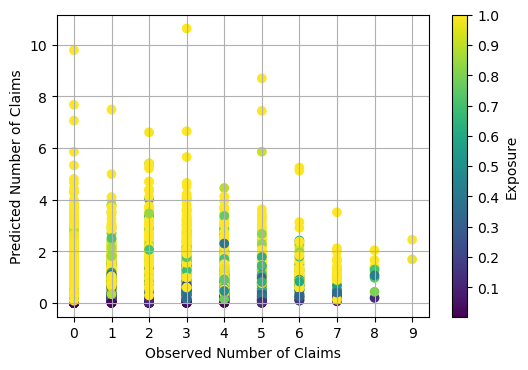

In [130]:
# Plot predicted number of claims versus observed number of claims
plt.figure(dpi = 100)
sg = plt.scatter(y_train, y_pred, c = e_train, marker = 'o')
plt.xlabel('Observed Number of Claims')
plt.ylabel('Predicted Number of Claims')
plt.xticks(range(10))
plt.grid(axis = 'both')
cbar = plt.colorbar(sg, label = 'Exposure')
cbar.set_ticks(numpy.arange(0.0, 1.1, 0.1))
plt.show()

We see the pattern of possion distribution. It looks more like like a uniformative model. They do not correlated much.

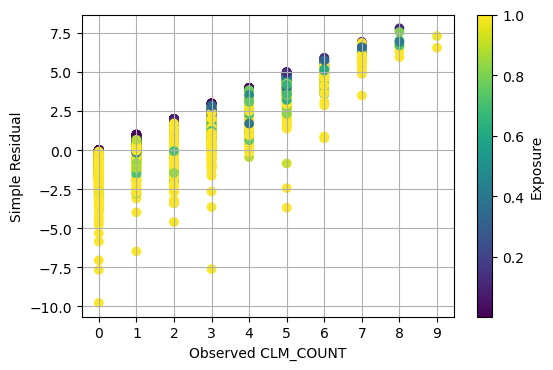

In [132]:
# Calculate simple residuals
y_resid = y_train - y_pred
plt.figure(dpi = 100)
sg = plt.scatter(y_train, y_resid, c = e_train, marker = 'o')
plt.xlabel('Observed CLM_COUNT')
plt.ylabel('Simple Residual')
plt.xticks(range(10))
plt.grid(axis = 'both')
plt.colorbar(sg, label = 'Exposure')
plt.show()

With low claim, we over-predicted then with high claim, we under predicted them. 

## b) Please plot the Deviance residuals versus the observed number of claims.

In [135]:
# Calculate deviance residuals

yPos = -numpy.log(1.0 - y_pred) - y_train * numpy.log(lamda) + lamda + constLLK
dR2 = numpy.where(y_train > 0.0, yPos, y_pred)
devResid = numpy.where(y_train > y_pred, 1.0, -1.0) * numpy.where(dR2 > 0.0, numpy.sqrt(2.0 * dR2),0)



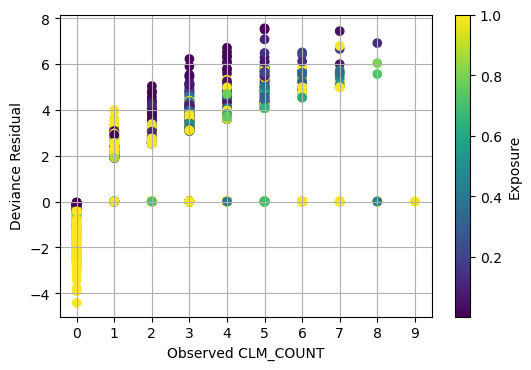

In [136]:
plt.figure(dpi = 100)
sg = plt.scatter(y_train, devResid, c = e_train, marker = 'o')
plt.xlabel('Observed CLM_COUNT')
plt.ylabel('Deviance Residual')
plt.xticks(range(10))
plt.grid(axis = 'both')
plt.colorbar(sg, label = 'Exposure')
plt.show()

Claim 0 has been underestimated a lot. and especially claim 5 has been overestimated.


# Question 4

## a) Please calculate the Root Mean Squared Error, the Relative Error, and the R-squared metrics.

In [137]:
# Root Mean Squared Error
y_resid = y_train - y_pred

mse = numpy.sum(numpy.power(y_resid, 2)) / n_sample
rmse = numpy.sqrt(mse)
print('Root Mean Squared Error = ', rmse)

# Relative Error
relerr = mse / numpy.var(y_train, ddof = 0)
print('Relative Error = ', relerr)

# R sqaure is the pearson correlation between observed y and predicted y
sqcor = numpy.power(numpy.corrcoef(y_train, y_pred), 2)
print('Squared Correlation = ', sqcor[0,1])

Root Mean Squared Error =  1.5164575285292132
Relative Error =  0.9947252006025722
Squared Correlation =  0.05899548511957736


Root Mean Squared Error =  1.5164575285292132
The typical difference between predicted claim count and the observed claim count is around 1.5.

Relative Error =  0.9947252006025722
Relative error close to 1, although not more than 1 but it it close to uninformative model.

Squared Correlation =  0.05899548511957735
This indicated the predicated claim count is practically little associated with the observed claim count.

## b) Please comment on the Final Model based on the above three metrics and the diagnostic charts in Question 3.

The model tends to underestimate the high claimed count group, which may harm their cost in business. It overestimates the low claim count that would hurt customer loyalty.
Some car type has failed of confident interval like Pannel truck and Van. It could due to the less claim filed historically.